In [3]:
import os

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6,8, 33, 34, 35]
    remove_indices = []
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction' , 'Household net adjusted disposable income','Household net financial wealth']].iloc[keep_indices]
   

In [5]:
datapath = os.path.join("datasets", "lifesat", "")

In [6]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [12]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
 
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
 
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X =  np.c_[country_stats["GDP per capita"],country_stats["Household net adjusted disposable income"],country_stats['Household net financial wealth']]
y =  np.c_[country_stats["Life satisfaction"]]
print(country_stats)

                 GDP per capita  Life satisfaction  \
Country                                              
Brazil                 8669.998                7.0   
Mexico                 9009.280                6.7   
Russia                 9054.914                6.0   
Turkey                 9437.372                5.6   
Hungary               12239.894                4.9   
Poland                12495.334                5.8   
Chile                 13340.905                6.7   
Slovak Republic       15991.736                6.1   
Czech Republic        17256.918                6.5   
Estonia               17288.083                5.6   
Greece                18064.288                4.8   
Portugal              19121.592                5.1   
Slovenia              20732.482                5.7   
Spain                 25864.721                6.5   
Korea                 27195.197                5.8   
Italy                 29866.581                6.0   
Japan                 32485.

<AxesSubplot:xlabel='Household net financial wealth', ylabel='Life satisfaction'>

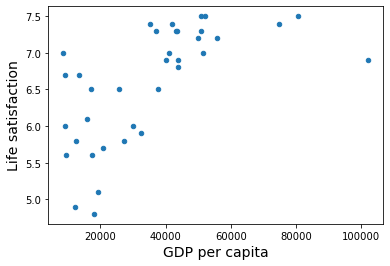

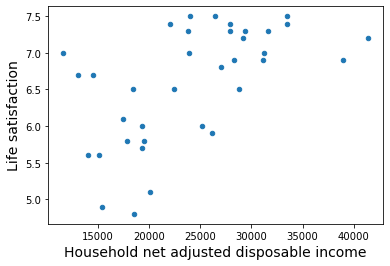

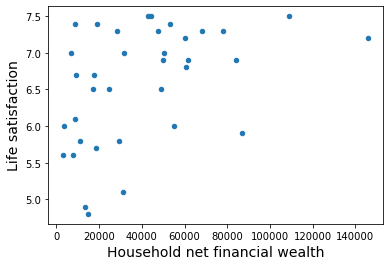

In [13]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
country_stats.plot(kind='scatter', x="Household net adjusted disposable income", y='Life satisfaction')
country_stats.plot(kind='scatter', x="Household net financial wealth", y='Life satisfaction')

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transforming the X data into a polynomial
poly_features = PolynomialFeatures(degree=2)
polyX = poly_features.fit_transform(X)

# Definition of the model
polyModel = LinearRegression()

# Training of the model with the polynomialRegression
polyModel.fit(polyX,y)

# For 2015
X_new = [[1784,1500,2000]]
X_newPoly = poly_features.fit_transform(X_new)

# Printing out the prediction
print(polyModel.predict(X_newPoly))

# For 2021
X_now =  [[2312,1000,700]]
X_nowPoly = poly_features.fit_transform(X_now)
print(polyModel.predict(X_nowPoly))

[[10.61491686]]
[[10.9842155]]


 What's is your output now?
 
For 2015 given arbitrarty values for subsequent values of X_new as: [1784,1500,200], result is: [10.61491686]

For 2021 given arbitrary values for X_now as:[2312,1000,700], result is: [10.9842155]

🗹 Do you think it makes a more accurate prediction? Why?

**Provide reasoning here**
